# Events Comparison - Spring 2019 and Spring 2020

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# set plot information
%matplotlib inline
sns.set_style('darkgrid')
# first get data_dir
data_dir = '/Users/andrew_boles/Documents/BUCC - Department Reports/EventsComparison/data/'
# import both csvs as dataframes
df_2019 = pd.read_csv(data_dir + 'events_spring2019.csv')
df_2020 = pd.read_csv(data_dir + 'events_spring2020.csv')
# renaming columns
new_column_names = ['CareerCenterName','EmployerName','EventStartDate','EventStartTime','EventName','EventType']
df_2019.columns = new_column_names
df_2020.columns = new_column_names

## Breakdown of the Events for each semester:

In [3]:
# different event counts for each year
print('Spring 2019 Event Types Count: ')
print(df_2019['EventType'].value_counts().to_string())
print('\nSpring 2020 Event Types Count: ')
print(df_2020['EventType'].value_counts().to_string())

Spring 2019 Event Types Count: 
Virtual Session           82
Employer On-site          54
Info Session              45
Other                     30
Workshop                   8
Speaker/Panel              3
Classroom Presentation     1

Spring 2020 Event Types Count: 
Info Session       19
Other              14
Workshop            9
Virtual Session     3


In [4]:
# remove Virtual Sessions
index_virtual_2019 = df_2019[df_2019['EventType'] == 'Virtual Session'].index
index_virtual_2020 = df_2020[df_2020['EventType'] == 'Virtual Session'].index
df_2019.drop(index_virtual_2019 , inplace=True)
df_2020.drop(index_virtual_2020, inplace=True)
# remove CPD Career Center Events
index_cpd_2019 = df_2019[df_2019['CareerCenterName'] == 'CPD Career Center'].index
df_2019.drop(index_cpd_2019, inplace=True)
# now lets check which employers were scheduled; create a series for each employers value_counts:
employers_2019 = df_2019['EmployerName'].value_counts()
employers_2020 = df_2020['EmployerName'].value_counts()

## Employers for each semester:
Note that there were **18 Employers** on campus in Spring 2019 and there are already **16 Employers** scheduled for Spring 2020.

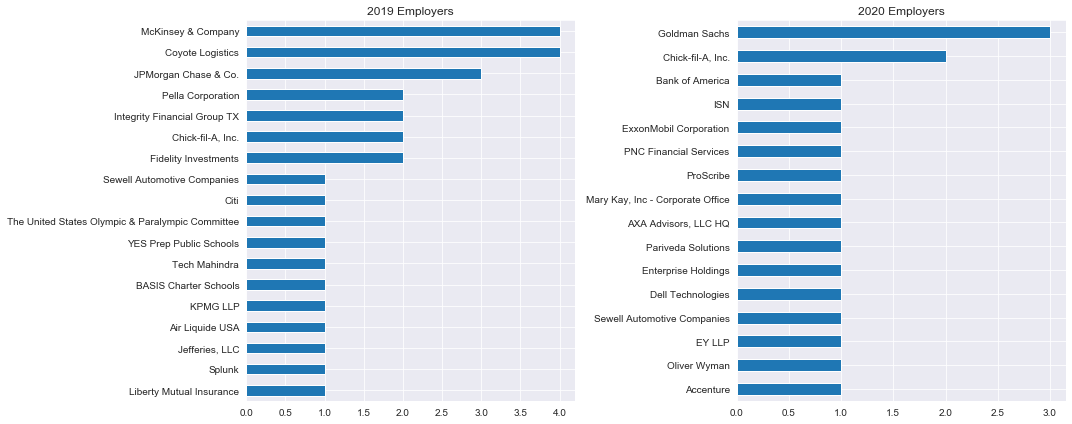

In [5]:
# look at the top 10 employers from each semester
employers_2019 = employers_2019.sort_values(ascending=True)
employers_2020 = employers_2020.sort_values(ascending=True)
fix, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
employers_2019.tail(20).plot(kind='barh', ax=ax1, title='2019 Employers')
employers_2020.tail(20).plot(kind='barh', ax=ax2, title='2020 Employers')
plt.tight_layout()

In [6]:
# create a df for just employer events; starting with 2019
df_2019['NumEventsPerDate'] = df_2019.groupby('EventStartDate')['EventStartDate'].transform('count')
df_2020['NumEventsPerDate'] = df_2020.groupby('EventStartDate')['EventStartDate'].transform('count')
df_employer_2019 = df_2019.dropna(subset=['EmployerName'])
df_employer_2020 = df_2020.dropna(subset=['EmployerName'])
# reset index
df_employer_2019 = df_employer_2019.reset_index(drop=True)
df_employer_2020 = df_employer_2020.reset_index(drop=True)
# convert date to datetime
df_employer_2019['EventStartDate'] = pd.to_datetime(df_employer_2019['EventStartDate'], format='%Y-%m-%d')
df_employer_2020['EventStartDate'] = pd.to_datetime(df_employer_2020['EventStartDate'], format='%Y-%m-%d')

## Distribution of Employer Events over each semester:

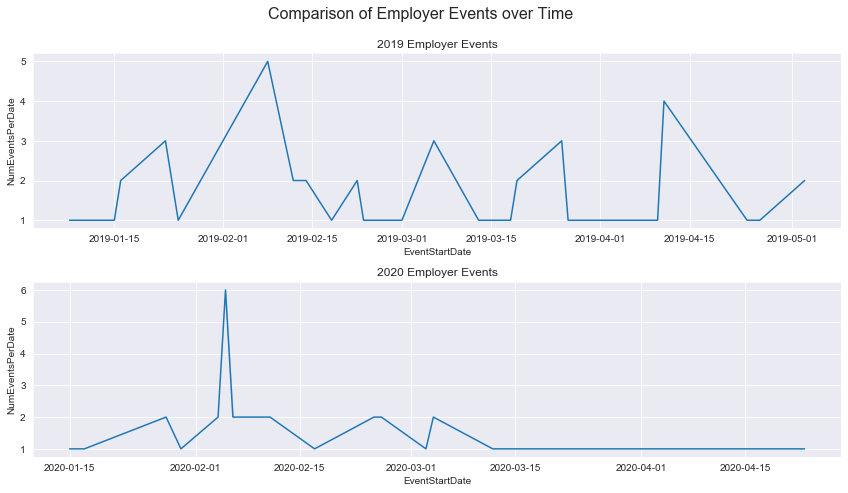

In [7]:
my_date_format = mdates.DateFormatter('%Y-%m-%d')
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,10))
sns.lineplot(x='EventStartDate', y='NumEventsPerDate', data=df_employer_2019, ax=ax1)
ax1.xaxis.set_major_formatter(my_date_format)
ax1.title.set_text('2019 Employer Events')
sns.lineplot(x='EventStartDate', y='NumEventsPerDate', data=df_employer_2020, ax=ax2)
ax2.xaxis.set_major_formatter(my_date_format)
ax2.title.set_text('2020 Employer Events')
fig.suptitle('Comparison of Employer Events over Time', fontsize=16)
plt.tight_layout(rect=[0,0.3,1,0.95])

In [8]:
# finally lets look at the workshops:
workshops_2019 = df_2019[df_2019['EventType'] == 'Workshop'].reset_index(drop=True)
workshops_2020 = df_2020[df_2020['EventType'] == 'Workshop'].reset_index(drop=True)

## Breakdown of the Workshops for each semester:
Note that Spring 2020 already has **3 times as many workshops scheduled** than Spring 2019 had in total.

In [9]:
print('2019 Workshop Counts: ')
print(workshops_2019['EventName'].value_counts().to_string())
print('\n2020 Workshop Counts: ')
print(workshops_2020['EventName'].value_counts().to_string())

2019 Workshop Counts: 
Accounting Pre-Internship Session - Internship Overview & Requirements    2
Tips for Success: Balancing Work, Life and Building Connections           1

2020 Workshop Counts: 
Café Résumé                                                                  3
The Path Forward                                                             1
Pariveda AI/ML Workshop                                                      1
Make-It Take-It Resume/Cover Letter Workshop for Robbins College Students    1
Start Smart Salary Negotiation Workshop for Women- Spring 2020               1
Career Workshop for International Students                                   1
Healthcare Careers Summit                                                    1
